# Ch 04 The Bias-Variance Trade-Off

A cost function tells us how far off our model predictions are from being correct. For classification problems, esp. fitting log regression models, a typical cost function is the log-loss function or cross entropy loss, it is defined as follows:

$\large \text{log loss} = \dfrac{1}{n}\sum_{i=1}^n-\left(y_i\log(p_i)+ (1-y_i)\log(1-p_i)\right)$

 * $n$ number of trianing samples
 * $y_i$ is the true label of the $i$th sample (1 or 0)
 * $p_i$ is the predicted probability that the label of the $i$th sample equals 1
 * $\text{log}$ is the natural log.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's plot the log loss functions for an individual observations, one for $p = 1$ and one for $p = 0$.

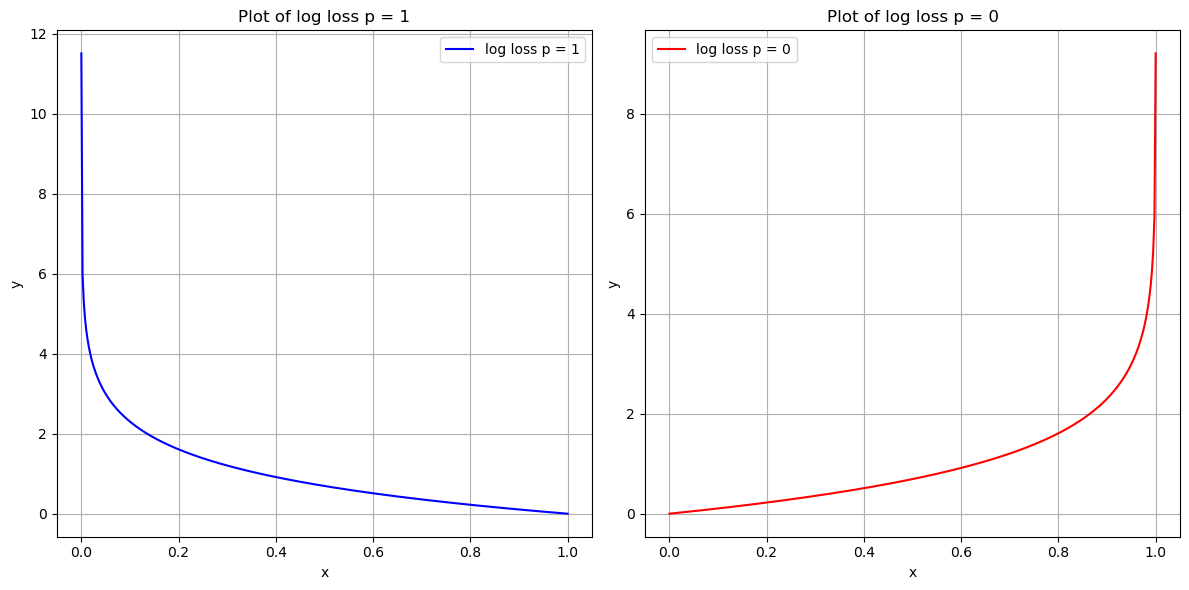

In [2]:
# Generate x values for both functions
x_values = np.linspace(0.00001, .9999, 400) # remember the domain of ln(x)! 

# Compute y values for y = log loss at 1
y_log_loss_1 = (-1)*np.log(x_values)

# Compute y values for y = log loss at 0
y_log_loss_0 = -np.log(1-(x_values))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot log loss p = 1
ax1.plot(x_values, y_log_loss_1, label='log loss p = 1', color='blue')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Plot of log loss p = 1')
ax1.grid(True)
ax1.legend()

# Plot log loss p = 0
ax2.plot(x_values, y_log_loss_0, label='log loss p = 0', color='red')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Plot of log loss p = 0')
ax2.grid(True)
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

These plots make sense. You are "penalized" greatly (a "high cost") when predicting a true value of 1 to be closer to zero, and similarly for predicting a true value of 0 to be close to 1.

Let's define a cost function $y = x^2 - 2x$ and use gradient descent.

In [16]:
X_poly = np.linspace(-3,5,81) # if the last value is 9 you get -3,-2...,4,5
X_poly

array([-3. , -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. ,
       -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9,
       -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,
        0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,
        1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,
        2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,
        3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,
        4.7,  4.8,  4.9,  5. ])

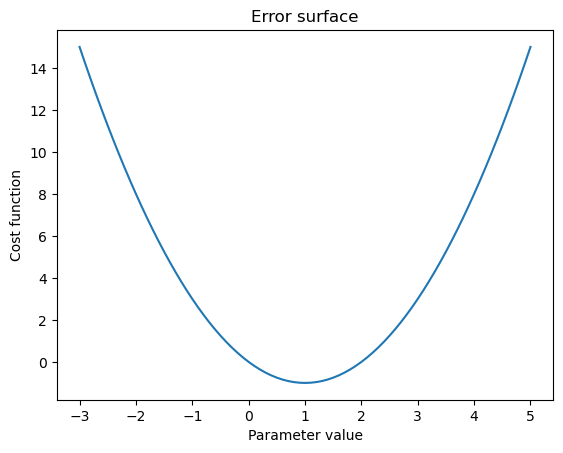

In [17]:
def cost_function(X):
    return X * (X - 2)
y_poly = cost_function(X_poly) # if np.linspace(-3,5,9) the function evaluates at interger values of x only
plt.plot(X_poly, y_poly)
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.title('Error surface')
plt.show()

**Gradient Descent** is defined in this book as $x_{\text{new}}= x_{\text{old}} - f'\left(x_{\text{old}}\right)*\text{learning rate}$

In [18]:
def gradient(X):
    return (2*X) - 2
x_start = 4.5 # why 4.5?
learning_rate = 0.75 # why ? 
x_next = x_start - gradient(x_start)*learning_rate
x_next

-0.75

**Quick check** 
\begin{align*} 
f(x) &= x^2 - 2x \\ 
& \text{and}\\
f'(x) &= 2x - 2 \\
& \text{and} \\
f'(4.5) &= 2(4.5)-2 \\
& = 9-2 \\ 
& = 7 \\
& \text{and} \\
4.5 - f'(4.5)*.75 &= 4.5 -  7*.75 \\
& = -.75
\end{align*}

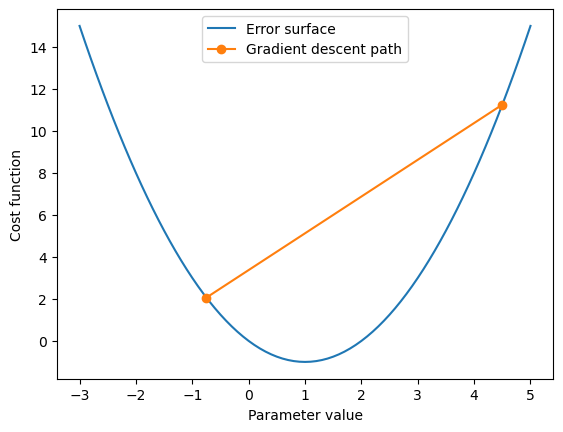

In [20]:
plt.plot(X_poly, y_poly)
plt.plot([x_start,x_next],[cost_function(x_start),cost_function(x_next)],'-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface', 'Gradient descent path'])
plt.show()

In [22]:
iterations = 15 
x_path = np.empty(iterations,)
x_path[0] = x_start
for iteration_count in range(1,iterations):
    derivative = gradient(x_path[iteration_count-1])
    x_path[iteration_count] = x_path[iteration_count-1]-(derivative*learning_rate)
x_path

array([ 4.5       , -0.75      ,  1.875     ,  0.5625    ,  1.21875   ,
        0.890625  ,  1.0546875 ,  0.97265625,  1.01367188,  0.99316406,
        1.00341797,  0.99829102,  1.00085449,  0.99957275,  1.00021362])

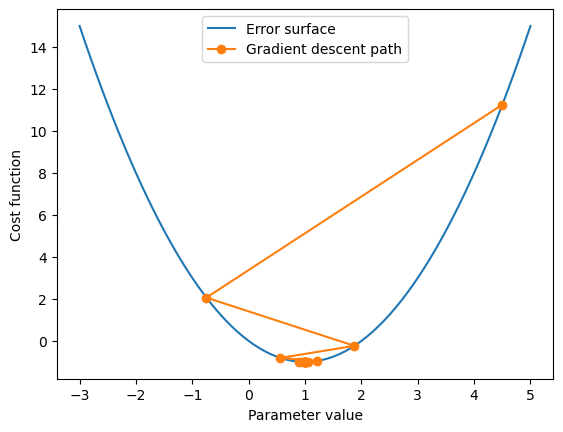

In [24]:
plt.plot(X_poly, y_poly)
plt.plot(x_path,cost_function(x_path),'-o')
plt.xlabel('Parameter value')
plt.ylabel('Cost function')
plt.legend(['Error surface','Gradient descent path'])
plt.show()